In [1]:
# Compares level 2 data with airplane location data
#
# Author: Brian Pitzel
# Date Created: 3 October 2024
# Date Modified: 7 November 2024

import numpy as np
import h5py 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import glob
import traffic
from traffic.data import opensky

%matplotlib widget


In [2]:
def retrieve_airplane_data(utc_time, time_filter, bounds):
    aircrafts_dbs = []
    
    airplane_start = utc_time[time_filter][0]
    for j in range(utc_time[time_filter].shape[0] - 1):
        this_timestamp = utc_time[time_filter][j]
        next_timestamp = utc_time[time_filter][j+1]
        if next_timestamp - this_timestamp >= datetime.timedelta(seconds=30): # if we are going to move onto another airplane
            airplane_end = this_timestamp
            #print(airplane_start, airplane_end)
            # get aircraft data for the airplane timeframe
            aircrafts_db = opensky.history(
                                airplane_start,
                                airplane_end,
                                bounds=bounds)
            aircrafts_dbs.append(aircrafts_db)

            airplane_start = next_timestamp

    return aircrafts_dbs

In [3]:
def load_airplane_data(filepath):
    file = open(filepath, 'rb')
    aircrafts_dbs = pickle.load(file)
    file.close()
    return aircrafts_dbs

In [4]:

SMALL_SIZE = 30 #38
MEDIUM_SIZE = 35 #42
BIGGER_SIZE = 50 #56

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig_width_inches = 17
fig_height_inches = 10

In [15]:
# get the aircraft data
bounds = (-109.375, 50.771, -106.0, 52.765) # west, south, east, north

# get the level 2 files
y = 2024
m = 8
d = 1
n_days = 6 # how many days starting at and including d-day
level2_files = [
        f'/mnt/NAS/airplane-data/L2-confined-proper/{y}_{m:02d}_{(d+i):02d}/ib3d_normal_swht_{y}_{m:02d}_{(d+i):02d}_prelate_bakker.h5'
        for i in range(n_days)
        ]
#level2_files = glob.glob(f'/mnt/NAS/airplane-data/L2/*/ib3d_normal_swht_20*.h5')
# descriptor for this run
descriptor = 'Airplane'

# set up vectorized timestamp converter
vutcfromtimestamp = np.vectorize(datetime.datetime.utcfromtimestamp)

# time interval of interest
t_start = [y,m,d,0,0,0]
t_end   = [y,m,d+n_days-1,23,59,59]

start_time = datetime.datetime(t_start[0], t_start[1], t_start[2], t_start[3], t_start[4], t_start[5])
end_time = datetime.datetime(t_end[0], t_end[1], t_end[2], t_end[3], t_end[4], t_end[5])

/mnt/NAS/airplane-data/L2-confined-proper/2024_08_01/ib3d_normal_swht_2024_08_01_prelate_bakker.h5
[250.5 231.  247.5 205.5 205.5 231.  243.  214.5 201.  208.5 253.5 228.
 228.  226.5 204.  201.  220.5 244.5 207.  214.5 240.  235.5 211.5 220.5
 220.5 220.5 220.5 220.5 220.5 220.5 220.5 220.5 220.5 222.  219.  247.5
 247.5 246.  249.  210.  243.  216.  253.5 222.  220.5 214.5 214.5 208.5
 231.  231.  217.5 217.5 229.5 235.5 253.5 204.  238.5 238.5 201.  243.
 202.5 237.  213.  225.  219.  219.  222.  205.5 222.  225.  225.  225.
 237.  244.5 241.5 229.5 207.  228.  229.5 253.5 249.  232.5 225.  228.
 237.  205.5 217.5 219.  223.5 244.5 231.  229.5 238.5 219.  210.  210.
 210.  229.5 211.5 253.5 228.  222.  247.5 243.  229.5 202.5 243.  220.5
 234.  234.  226.5 246.  234.  213.  243.  234.  208.5 237.  201.  249.
 246.  204.  202.5 214.5 241.5 231.  208.5 246.  238.5 210.  226.5 234.
 214.5 250.5 229.5 238.5 208.5 217.5 207.  241.5 217.5 222.  247.5 222.
 219.  217.5 232.5 204.  207.  21

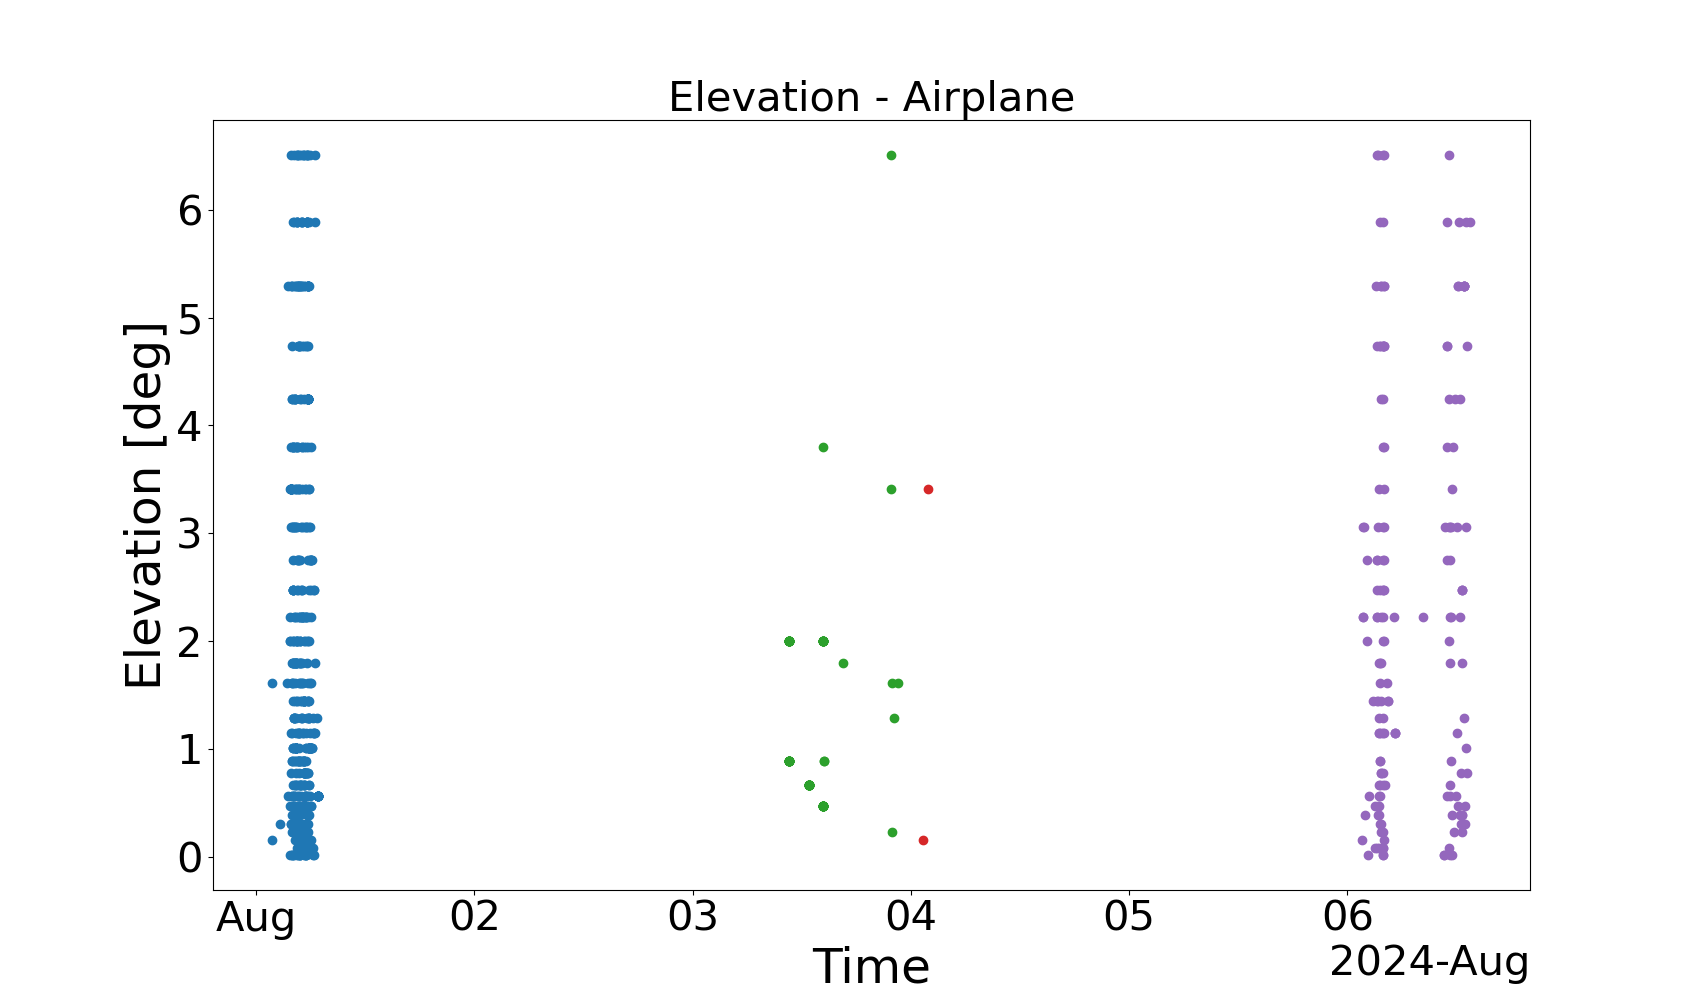

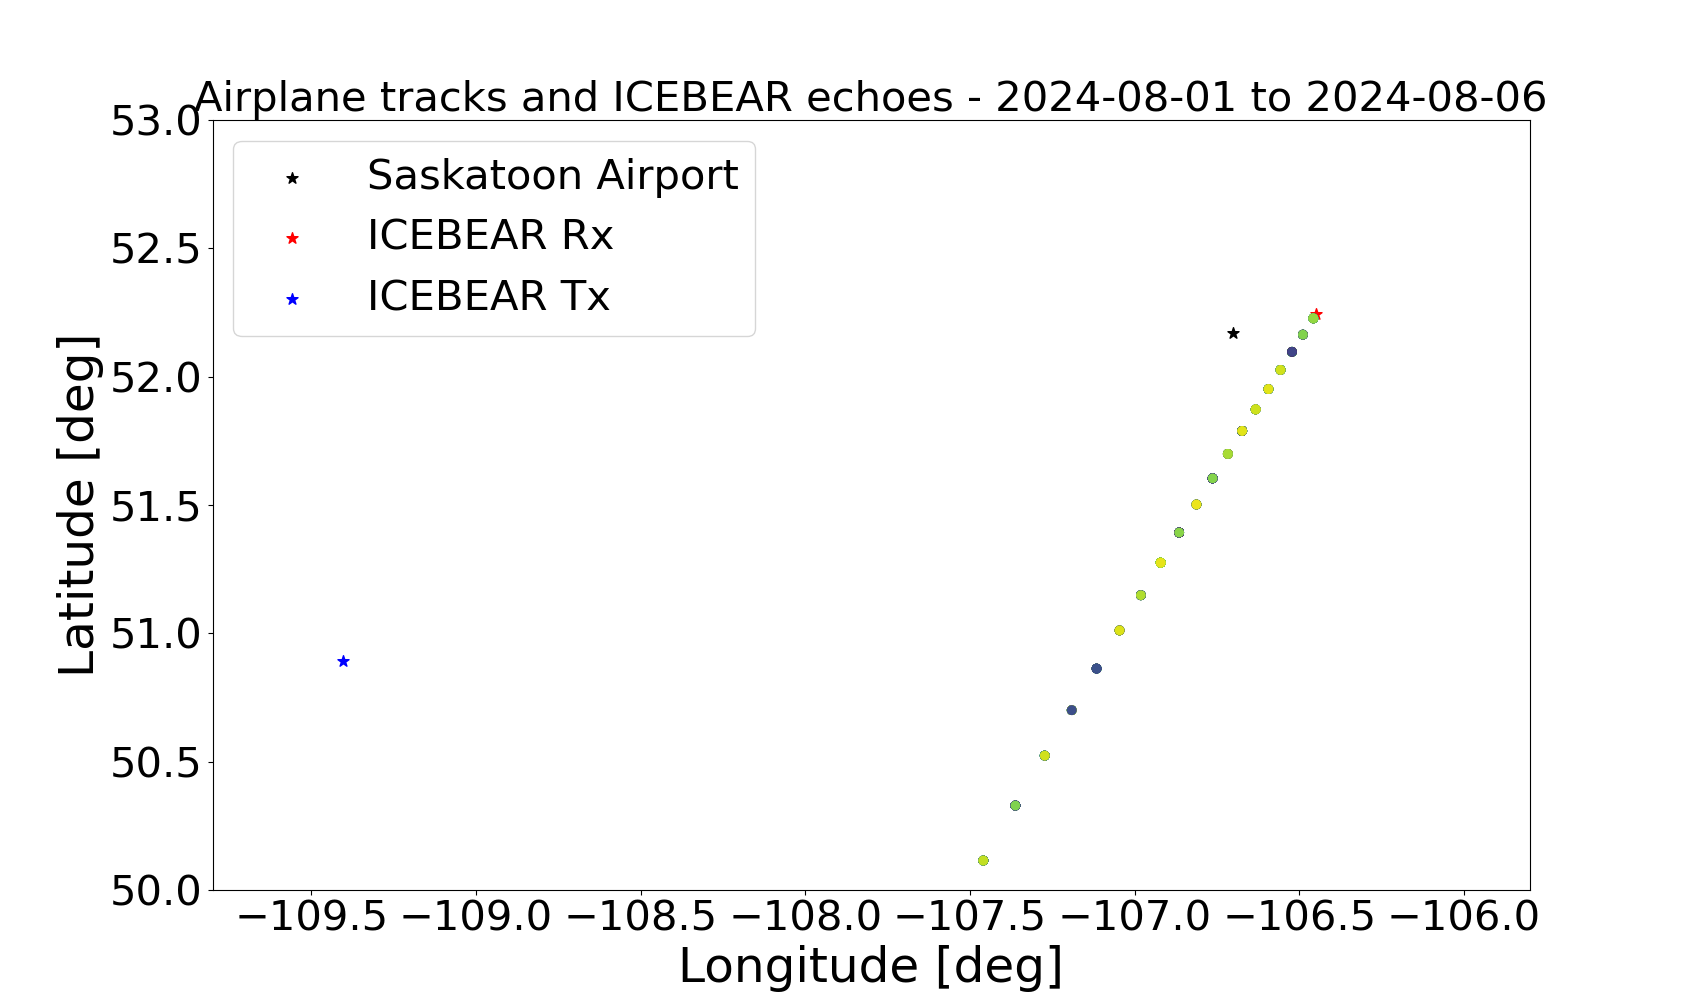

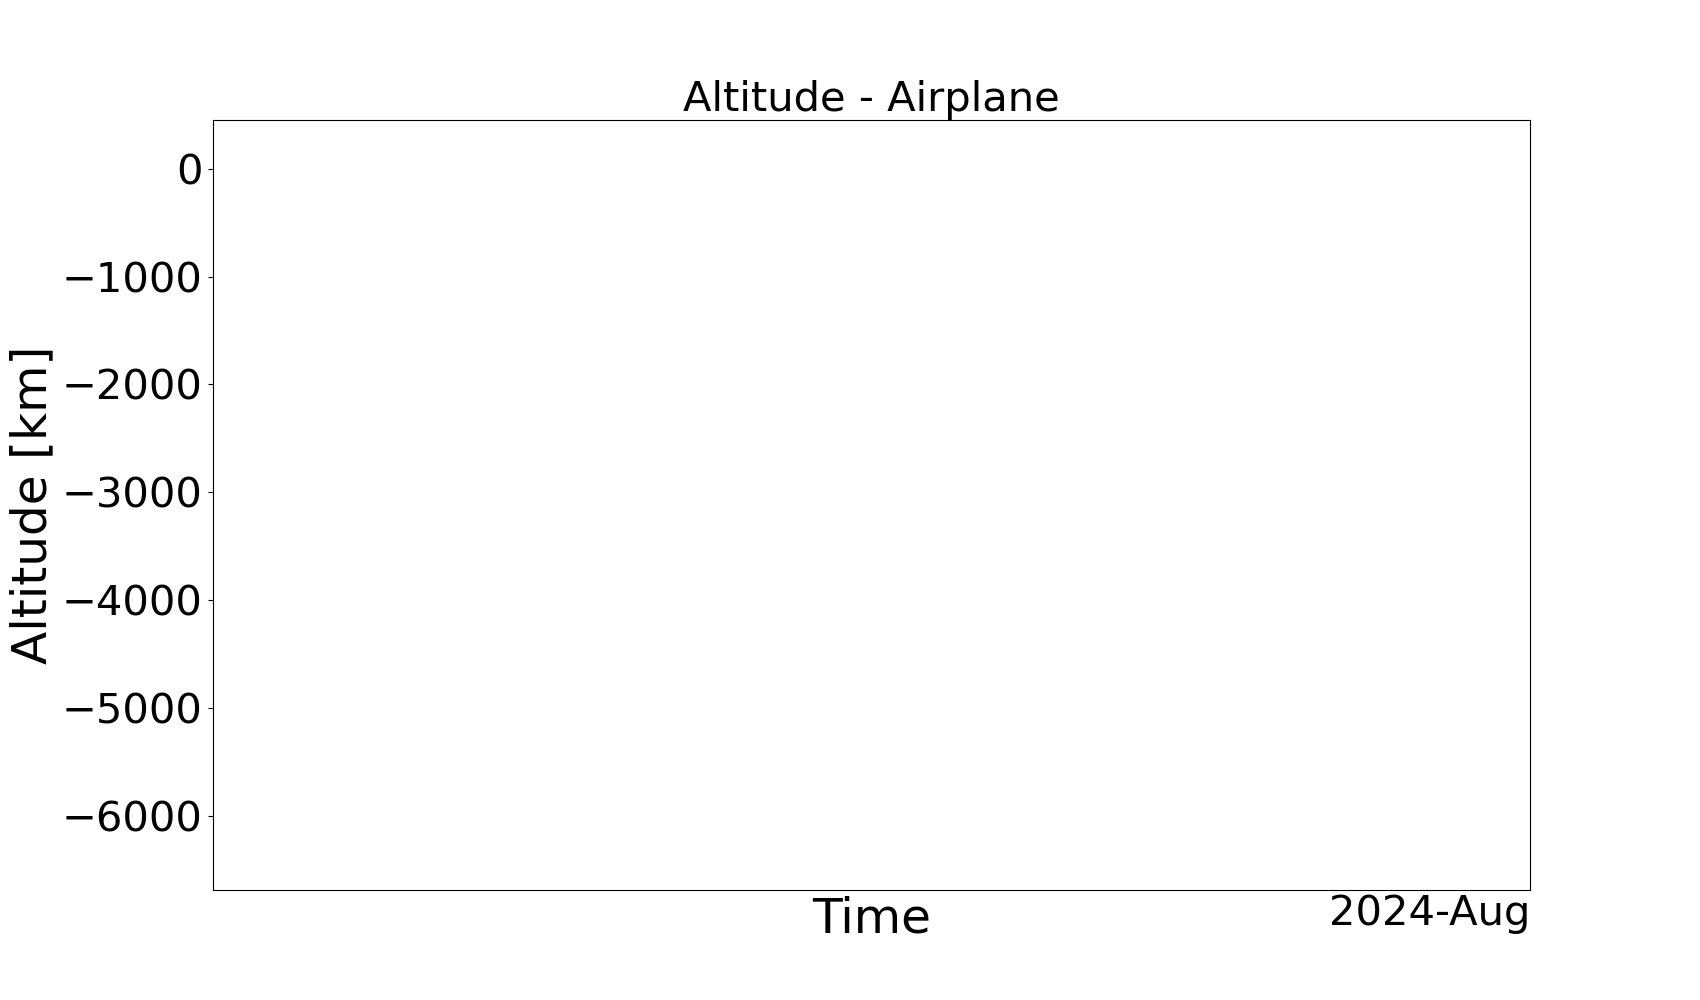

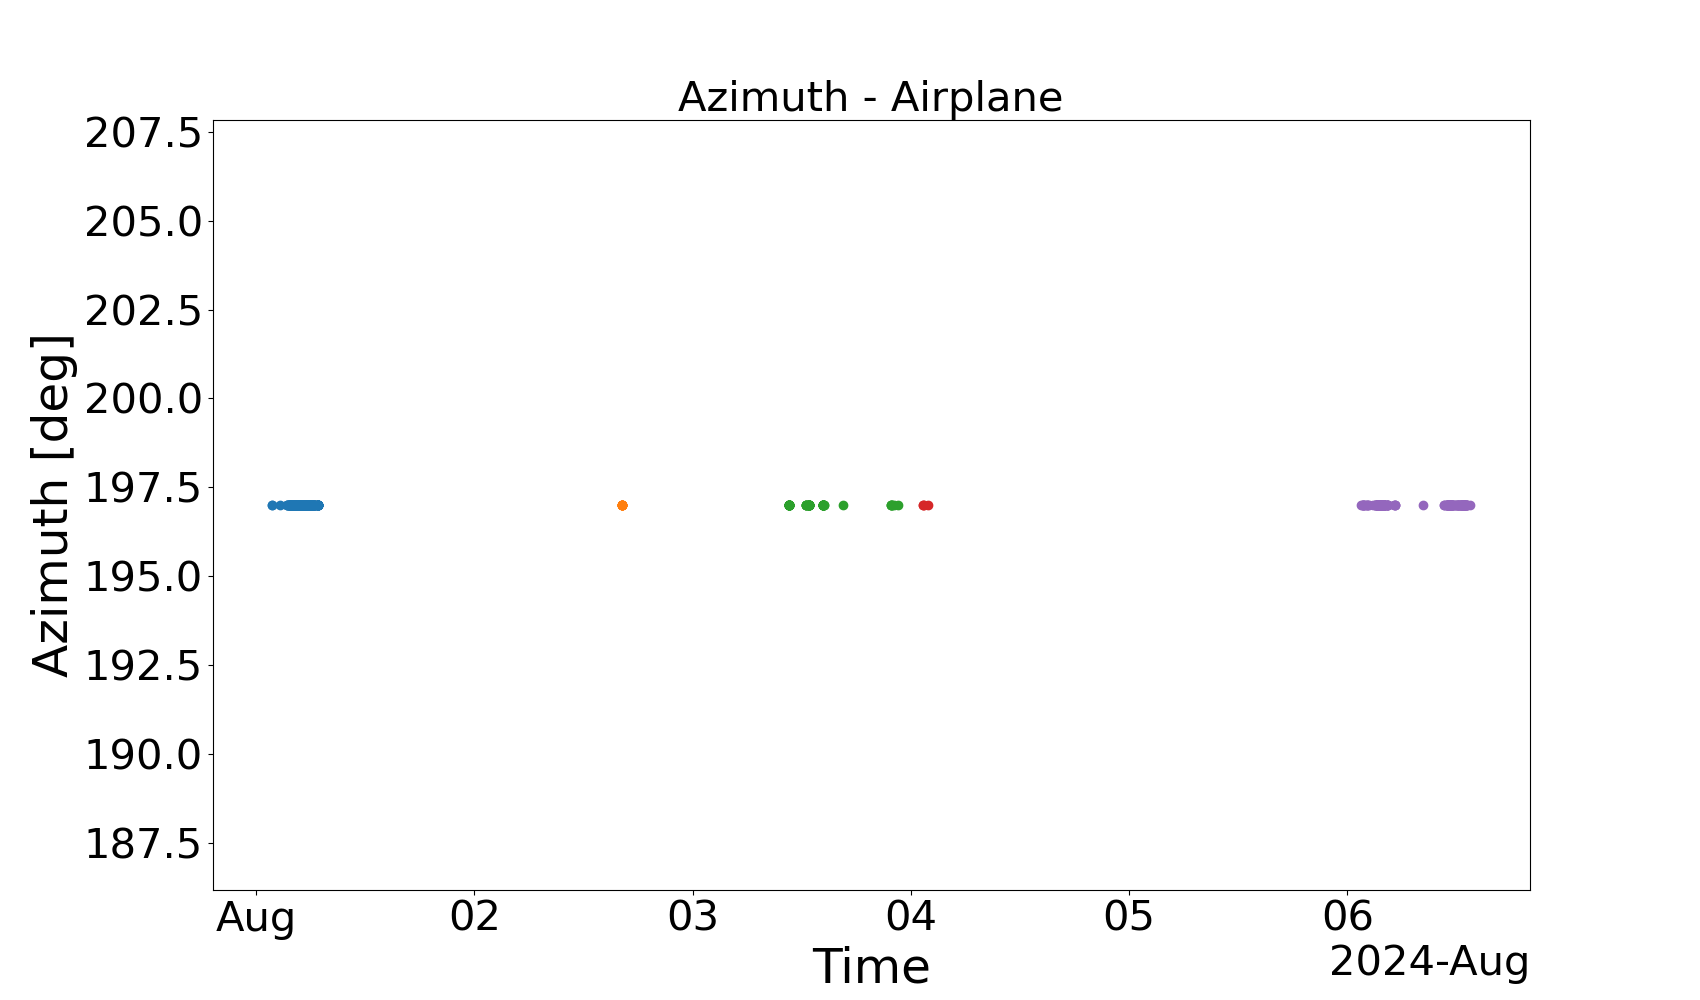

In [16]:
# set up axes
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)

fig_ll, ax_ll = plt.subplots()
fig_ll.set_size_inches(fig_width_inches, fig_height_inches)
ax_ll.set_ylabel('Latitude [deg]')
ax_ll.set_xlabel('Longitude [deg]')
ax_ll.set_title(f'Airplane tracks and ICEBEAR echoes - {start_time.strftime("%Y-%m-%d")} to {end_time.strftime("%Y-%m-%d")}')
stoon_airport = [52.17145, -106.70039]
icebear_rx = [52.24393, -106.45025]
icebear_tx = [50.89335, -109.40317]
ax_ll.scatter(stoon_airport[1], stoon_airport[0], marker='*', c='black', s=70)
ax_ll.scatter(icebear_rx[1], icebear_rx[0], marker='*', c='r', s=70)
ax_ll.scatter(icebear_tx[1], icebear_tx[0], marker='*', c='b', s=70)
ax_ll.set_xlim([-109.8, -105.8])
ax_ll.set_ylim([50, 53])
ax_ll.legend(['Saskatoon Airport','ICEBEAR Rx','ICEBEAR Tx'])

fig_alt, ax_alt = plt.subplots()
fig_alt.set_size_inches(fig_width_inches, fig_height_inches)
ax_alt.set_ylabel('Altitude [km]')
ax_alt.set_xlabel('Time')
ax_alt.set_xlim([0, 15])
ax_alt.set_title(f'Altitude - {descriptor}')
ax_alt.xaxis.set_major_locator(locator)
ax_alt.xaxis.set_major_formatter(formatter)

fig_az, ax_az = plt.subplots()
fig_az.set_size_inches(fig_width_inches, fig_height_inches)
ax_az.set_ylabel('Azimuth [deg]')
ax_az.set_xlabel('Time')
ax_az.set_title(f'Azimuth - {descriptor}')
ax_az.xaxis.set_major_locator(locator)
ax_az.xaxis.set_major_formatter(formatter)

fig_el, ax_el = plt.subplots()
fig_el.set_size_inches(fig_width_inches, fig_height_inches)
ax_el.set_ylabel('Elevation [deg]')
ax_el.set_xlabel('Time')
ax_el.set_title(f'Elevation - {descriptor}')
ax_el.xaxis.set_major_locator(locator)
ax_el.xaxis.set_major_formatter(formatter)


for file in level2_files:
    print(file)
    try:
        f = h5py.File(file)
    except Exception:
        continue
    altitude = f['data']['altitude'][:]
    azimuth = f['data']['azimuth'][:]
    doppler_shift = f['data']['doppler_shift'][:]
    elevation = f['data']['elevation'][:]
    latitude = f['data']['latitude'][:]
    longitude = f['data']['longitude'][:]
    rf_distance = f['data']['rf_distance'][:]
    slant_range = f['data']['slant_range'][:]
    snr_db = f['data']['snr_db'][:]
    time = f['data']['time'][:]
    utc_time = vutcfromtimestamp(time)

    forbidden_days = [5, 15, 26]
    if utc_time[0].day in forbidden_days:
        continue
    
    time_filter = (utc_time < end_time) & (utc_time > start_time) 
    print(rf_distance[time_filter])
    #range_filter = (rf_distance < 310) & (rf_distance > 285)
    #time_filter = time_filter & range_filter

    # plot lat/lon
    ax_ll.scatter(longitude[time_filter], latitude[time_filter], c=time[time_filter])
    
    # plot alt/time
    ax_alt.scatter(utc_time[time_filter], altitude[time_filter])#, c=snr_db[time_filter])
    
    # plot az and el / time
    ax_az.scatter(utc_time[time_filter], azimuth[time_filter])
    ax_el.scatter(utc_time[time_filter], elevation[time_filter])

plt.show()

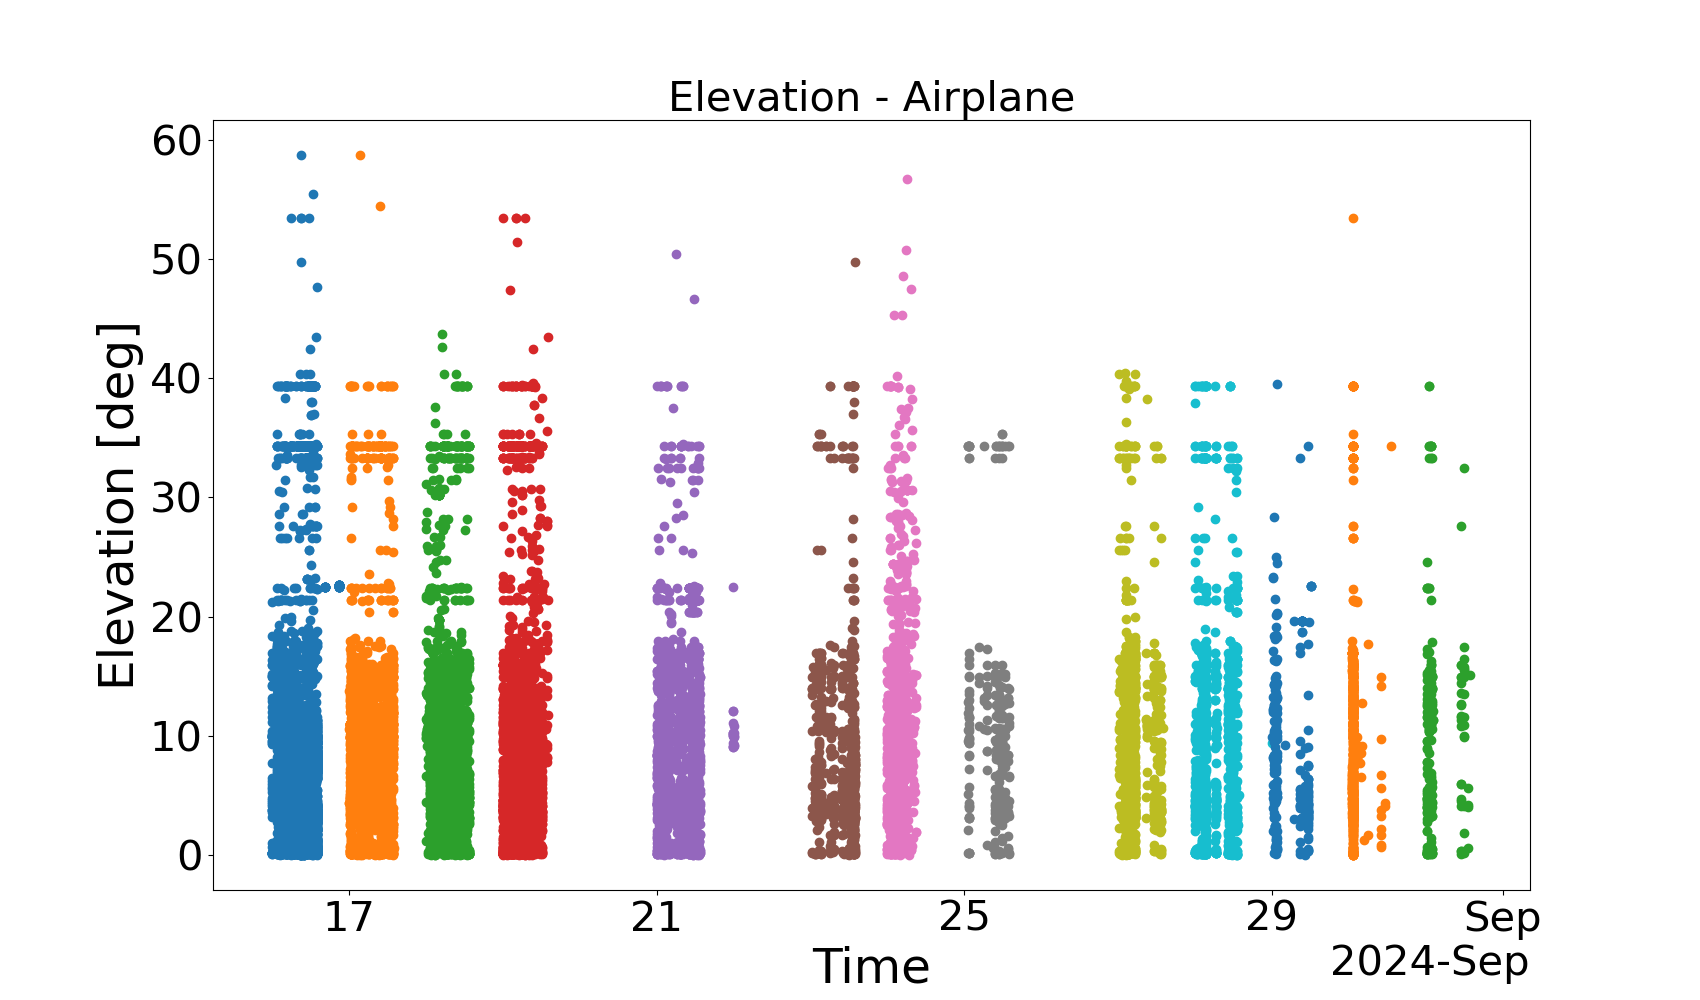

In [5]:
# aircraft tracks

lons = []
lats = []

aircrafts_dbs = load_airplane_data('/home/ibp2/airplane-process/airplane-code/arcrafts_dbs_2024-08-01_to_2024-08-15.pckl')

for db in aircrafts_dbs:
    # db is a database of every airplane in the timeframe.
    if db == None:
        continue
    
    # db[i].data.long/lat is the time series of data for one airplane (i)


    for i in range(len(db)): # db[i] is a single airplane in the timeframe.
        if len(db[i].data.timestamp) > 60:
            continue
        
        ax_ll.plot(db[i].data.longitude, db[i].data.latitude)
        #ax_alt.scatter(aircrafts_db[i].data.timestamp, aircrafts_db[i].data.altitude / 3.281 / 1000)
        lons.append(db[i].data.longitude)
        lats.append(db[i].data.latitude)



lons = np.hstack(lons)
lats = np.hstack(lats)

plt.show()

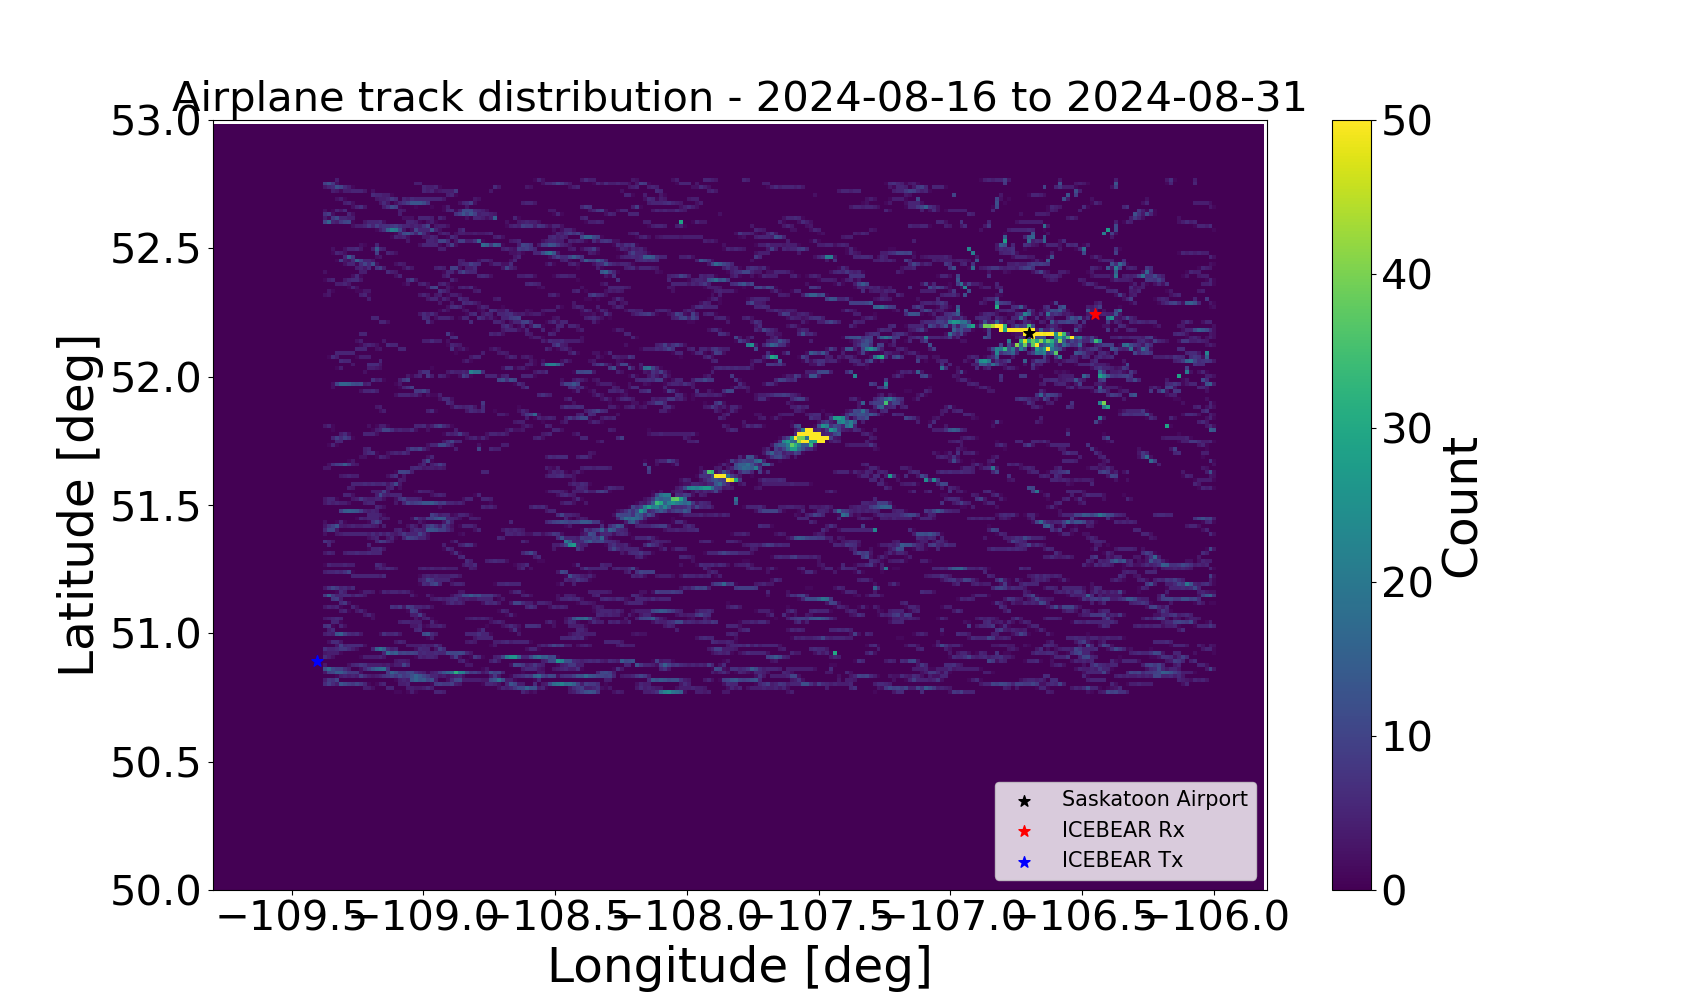

In [6]:
fig_hist, ax_hist = plt.subplots()
fig_hist.set_size_inches(fig_width_inches, fig_height_inches)
ax_hist.set_ylabel('Latitude [deg]')
ax_hist.set_xlabel('Longitude [deg]')
ax_hist.set_title(f'Airplane track distribution - {start_time.strftime("%Y-%m-%d")} to {end_time.strftime("%Y-%m-%d")}')


x_edges = np.arange(-109.8, -105.8, 0.015)
y_edges = np.arange(50, 53, 0.015)

lons = np.hstack(lons)
lats = np.hstack(lats)
h = ax_hist.hist2d(lons, lats, bins=[x_edges, y_edges], range=[[-109.8, -105.8],[50, 53]], vmin=0, vmax=50)
c = plt.colorbar(h[3], ax=ax_hist, label='Count')
stoon_airport = [52.17145, -106.70039]
icebear_rx = [52.24393, -106.45025]
icebear_tx = [50.89335, -109.40317]
ax_hist.scatter(stoon_airport[1], stoon_airport[0], marker='*', c='black', s=70)
ax_hist.scatter(icebear_rx[1], icebear_rx[0], marker='*', c='r', s=70)
ax_hist.scatter(icebear_tx[1], icebear_tx[0], marker='*', c='b', s=70)
ax_hist.legend(['Saskatoon Airport','ICEBEAR Rx','ICEBEAR Tx'], loc='lower right', prop={'size': 15})

ax_hist.set_xlim([-109.8, -105.8])
ax_hist.set_ylim([50, 53])
plt.show()

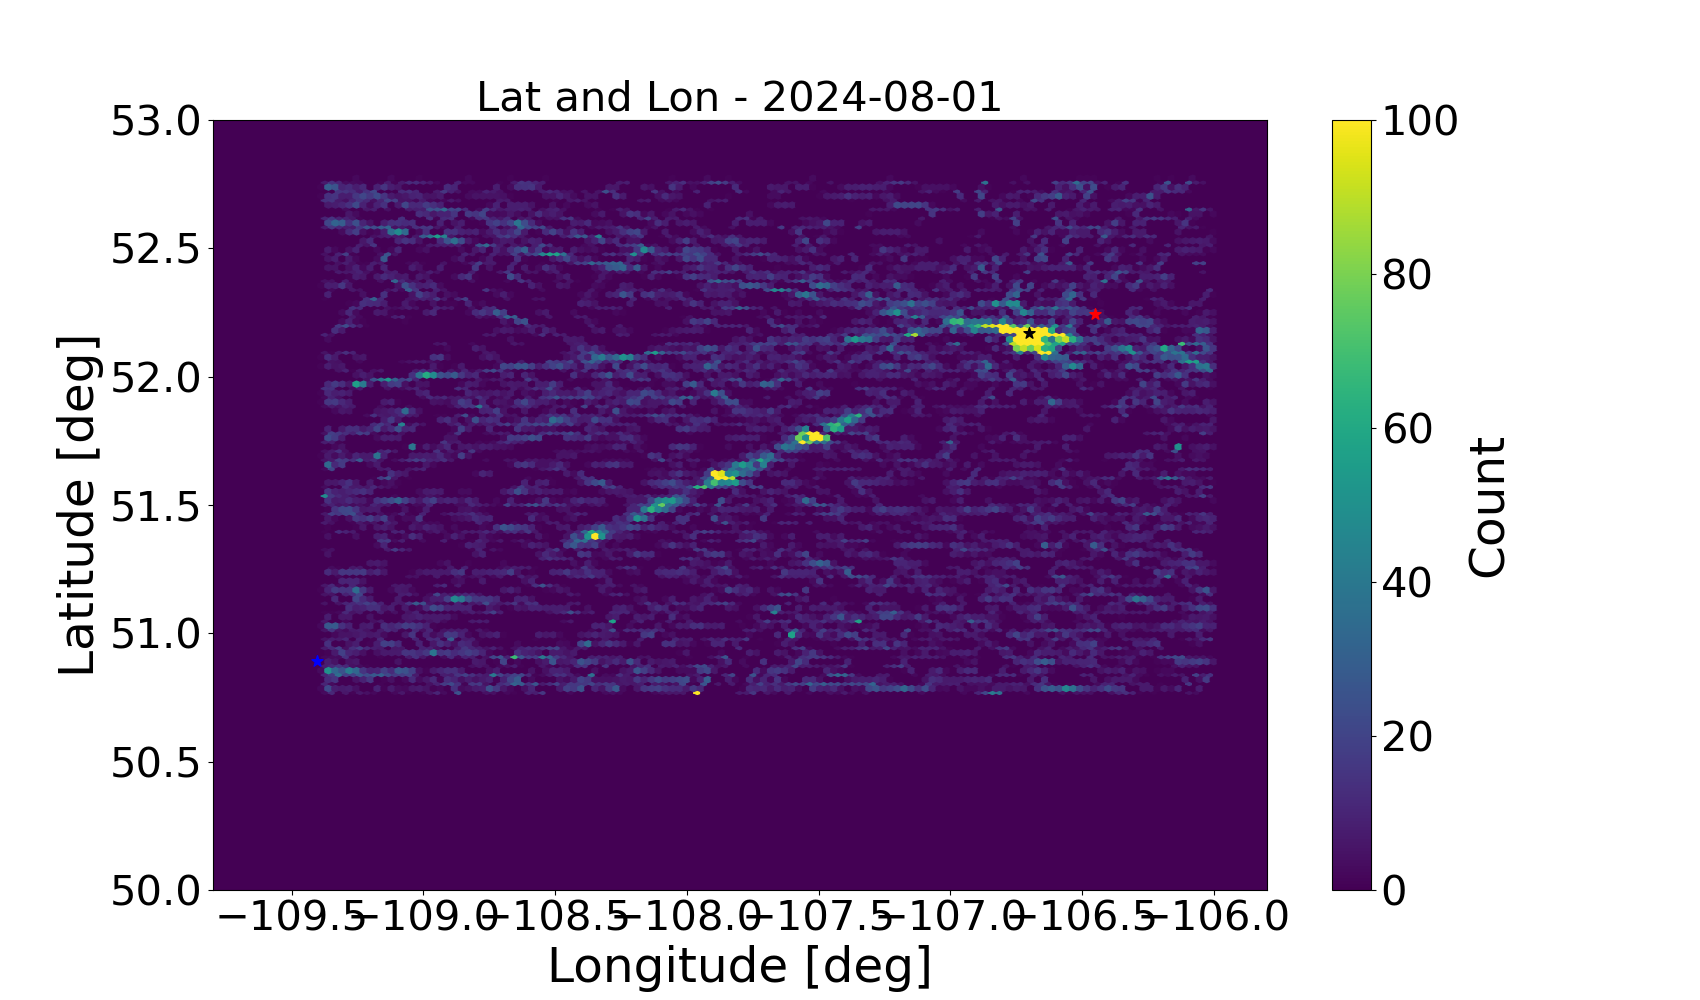

In [8]:
fig_hist, ax_hist = plt.subplots()
fig_hist.set_size_inches(fig_width_inches, fig_height_inches)
ax_hist.set_ylabel('Latitude [deg]')
ax_hist.set_xlabel('Longitude [deg]')
ax_hist.set_title(f'Lat and Lon - {start_time.strftime("%Y-%m-%d")}' )

extent = (-109.8, -105.8, 50, 53)

h = ax_hist.hexbin(lons, lats, extent=extent, gridsize=150, vmin=0, vmax=100)
c = plt.colorbar(h, ax=ax_hist, label='Count')
stoon_airport = [52.17145, -106.70039]
icebear_rx = [52.24393, -106.45025]
icebear_tx = [50.89335, -109.40317]
ax_hist.scatter(stoon_airport[1], stoon_airport[0], marker='*', c='black', s=70)
ax_hist.scatter(icebear_rx[1], icebear_rx[0], marker='*', c='r', s=70)
ax_hist.scatter(icebear_tx[1], icebear_tx[0], marker='*', c='b', s=70)
#ax_hist.legend(['Saskatoon Airport','ICEBEAR Rx','ICEBEAR Tx'], loc='lower right')

ax_hist.set_xlim([-109.8, -105.8])
ax_hist.set_ylim([50, 53])
plt.show()

In [7]:
import pickle

# open a file, where you ant to store the data
file = open('aircrafts_dbs_2024-08-16_to_2024-08-31.pckl', 'wb')

# dump information to that file
pickle.dump(aircrafts_dbs, file)

# close the file
file.close()

In [8]:

lons = []
lats = []

# file = open('aircrafts_dbs_2024-07-20_to_2024-07-31.pckl', 'rb')
# dbs = pickle.load(file)

# for db in dbs:
#     # db is a database of every airplane in the timeframe.
#     if db == None:
#         continue
    
#     # db[i].data.long/lat is the time series of data for one airplane (i)


#     for i in range(len(db)): # db[i] is a single airplane in the timeframe.
#         if len(db[i].data.timestamp) > 60:
#             continue
    
#         lons.append(db[i].data.longitude)
#         lats.append(db[i].data.latitude)

# file.close()

file = open('aircrafts_dbs_2024-08-01_to_2024-08-15.pckl', 'rb')
dbs = pickle.load(file)

for db in dbs:
    # db is a database of every airplane in the timeframe.
    if db == None:
        continue
    
    # db[i].data.long/lat is the time series of data for one airplane (i)


    for i in range(len(db)): # db[i] is a single airplane in the timeframe.
        if len(db[i].data.timestamp) > 60:
            continue
    
        lons.append(db[i].data.longitude)
        lats.append(db[i].data.latitude)


file.close()

file = open('aircrafts_dbs_2024-08-16_to_2024-08-31.pckl', 'rb')
dbs = pickle.load(file)

for db in dbs:
    # db is a database of every airplane in the timeframe.
    if db == None:
        continue
    
    # db[i].data.long/lat is the time series of data for one airplane (i)


    for i in range(len(db)): # db[i] is a single airplane in the timeframe.
        if len(db[i].data.timestamp) > 60:
            continue
    
        lons.append(db[i].data.longitude)
        lats.append(db[i].data.latitude)


file.close()


lons = np.hstack(lons)
lats = np.hstack(lats)

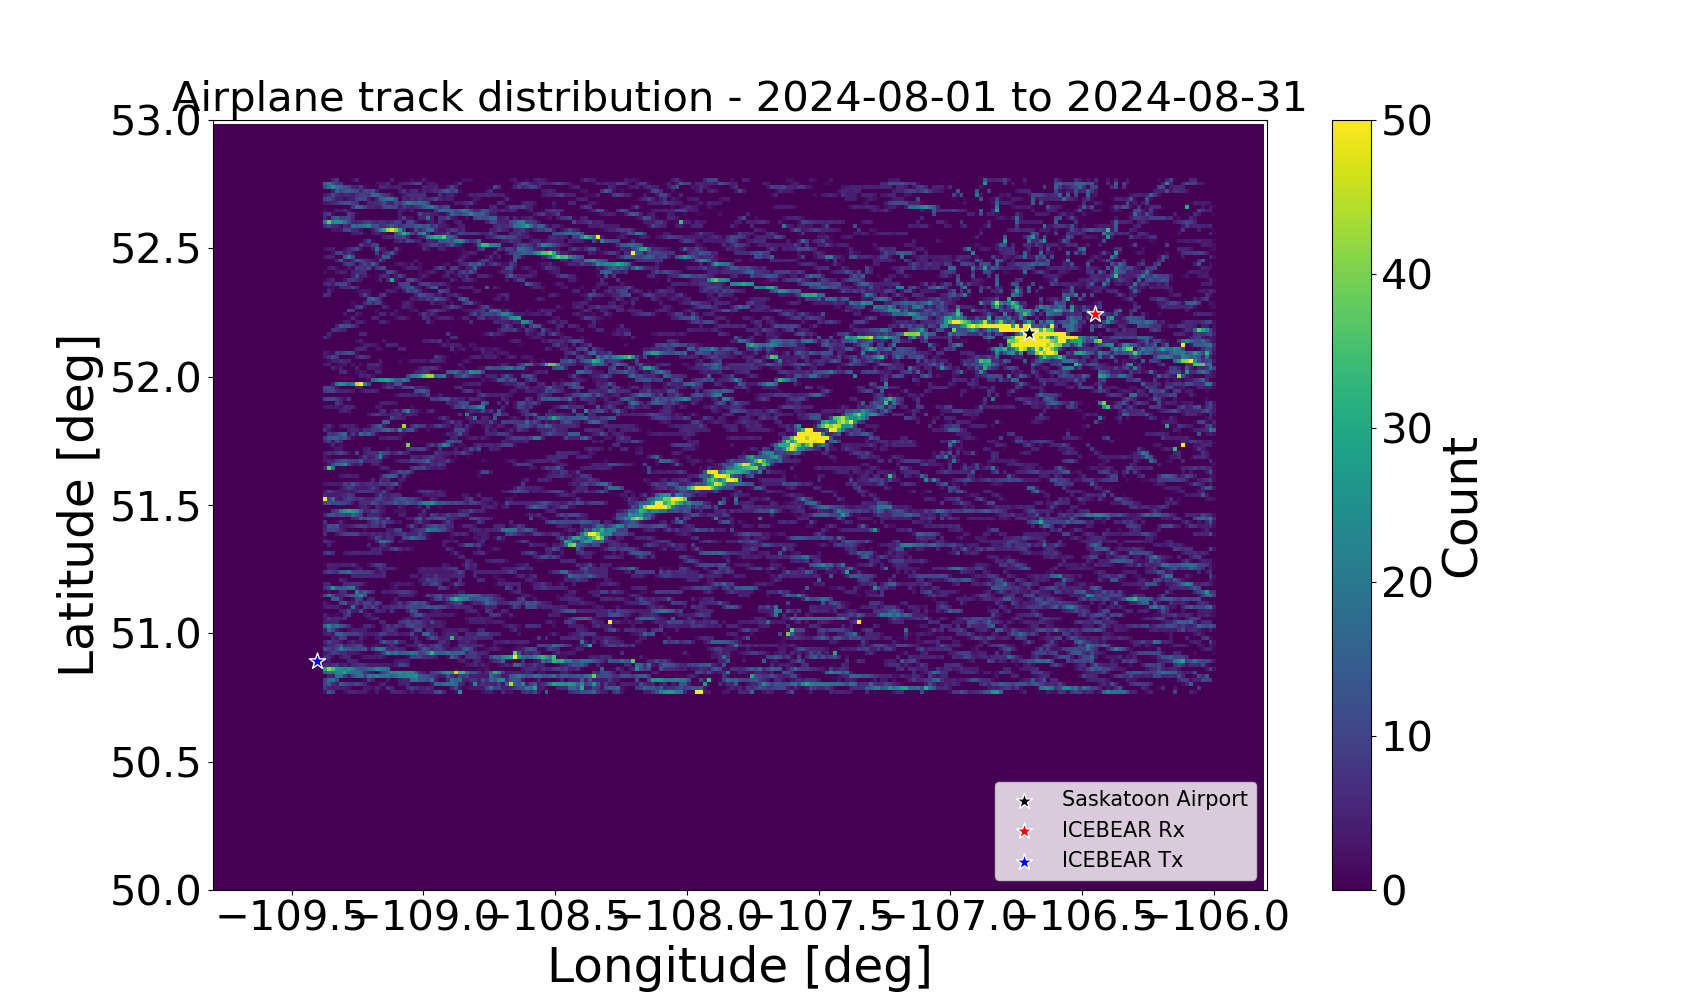

In [20]:
fig_hist, ax_hist = plt.subplots()
fig_hist.set_size_inches(fig_width_inches, fig_height_inches)
ax_hist.set_ylabel('Latitude [deg]')
ax_hist.set_xlabel('Longitude [deg]')
ax_hist.set_title(f'Airplane track distribution - 2024-08-01 to {end_time.strftime("%Y-%m-%d")}')


x_edges = np.arange(-109.8, -105.8, 0.015)
y_edges = np.arange(50, 53, 0.015)

lons = np.hstack(lons)
lats = np.hstack(lats)
h = ax_hist.hist2d(lons, lats, bins=[x_edges, y_edges], range=[[-109.8, -105.8],[50, 53]], vmin=0, vmax=50, cmap='viridis')
c = plt.colorbar(h[3], ax=ax_hist, label='Count')
stoon_airport = [52.17145, -106.70039]
icebear_rx = [52.24393, -106.45025]
icebear_tx = [50.89335, -109.40317]
ax_hist.scatter(stoon_airport[1], stoon_airport[0], marker='*', c='black', s=150, edgecolor='white')
ax_hist.scatter(icebear_rx[1], icebear_rx[0], marker='*', c='r', s=150, edgecolor='white')
ax_hist.scatter(icebear_tx[1], icebear_tx[0], marker='*', c='b', s=150, edgecolor='white')
ax_hist.legend(['Saskatoon Airport','ICEBEAR Rx','ICEBEAR Tx'], loc='lower right', prop={'size': 15})

ax_hist.set_xlim([-109.8, -105.8])
ax_hist.set_ylim([50, 53])
plt.show()